In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.cm as cm


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
df = pd.read_csv('traffic_accident.csv')
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:

df.drop_duplicates(inplace=True)

In [5]:
#adding a 'year' column
df['crash_year'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.year.astype('int64')

In [6]:
print("📊 Dataset Overview")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")

# Display basic info
df.info()

📊 Dataset Overview
Dataset Shape: (209275, 25)
Total Rows: 209,275
Features: 25
<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209275 non-null  object 
 1   traffic_control_device         209275 non-null  object 
 2   weather_condition              209275 non-null  object 
 3   lighting_condition             209275 non-null  object 
 4   first_crash_type               209275 non-null  object 
 5   trafficway_type                209275 non-null  object 
 6   alignment                      209275 non-null  object 
 7   roadway_surface_cond           209275 non-null  object 
 8   road_defect                    209275 non-null  object 
 9   crash_type                     209275 non-null  object 
 10  intersection_related_i         209275 non-null  object 
 11  damage          

In [7]:
numerical_stats = df.select_dtypes(include=['int64', 'float64']).describe()
numerical_stats.round(2)

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,crash_year
count,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00,209275.00
mean,2.06,0.38,0.00,0.04,0.22,0.12,2.24,13.37,4.14,6.77,2020.42
std,0.40,0.80,0.05,0.23,0.61,0.45,1.24,5.60,1.97,3.43,2.43
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2013.00
25%,2.00,0.00,0.00,0.00,0.00,0.00,2.00,9.00,2.00,4.00,2018.00
50%,2.00,0.00,0.00,0.00,0.00,0.00,2.00,14.00,4.00,7.00,2020.00
75%,2.00,1.00,0.00,0.00,0.00,0.00,3.00,17.00,6.00,10.00,2023.00
max,11.00,21.00,3.00,7.00,21.00,15.00,49.00,23.00,7.00,12.00,2025.00


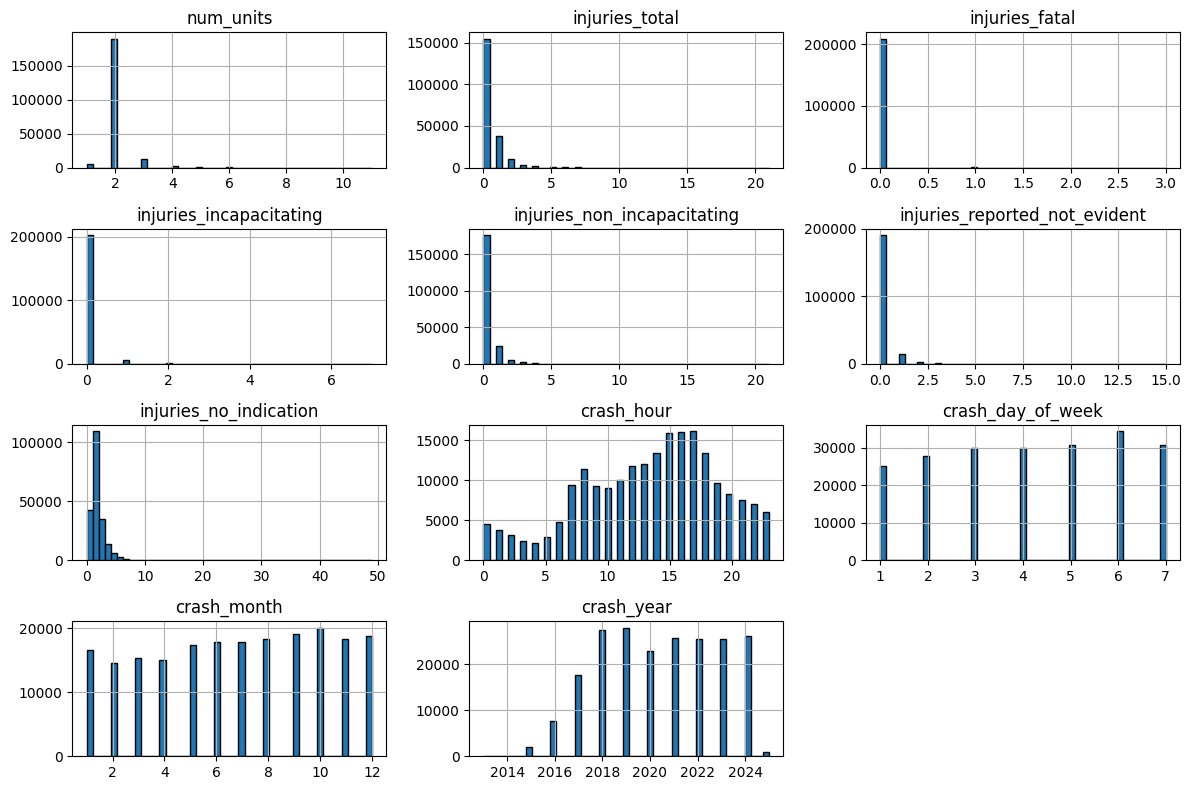

In [8]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 8),bins = 47,rwidth=1.2, edgecolor='black')
plt.tight_layout()
plt.show()

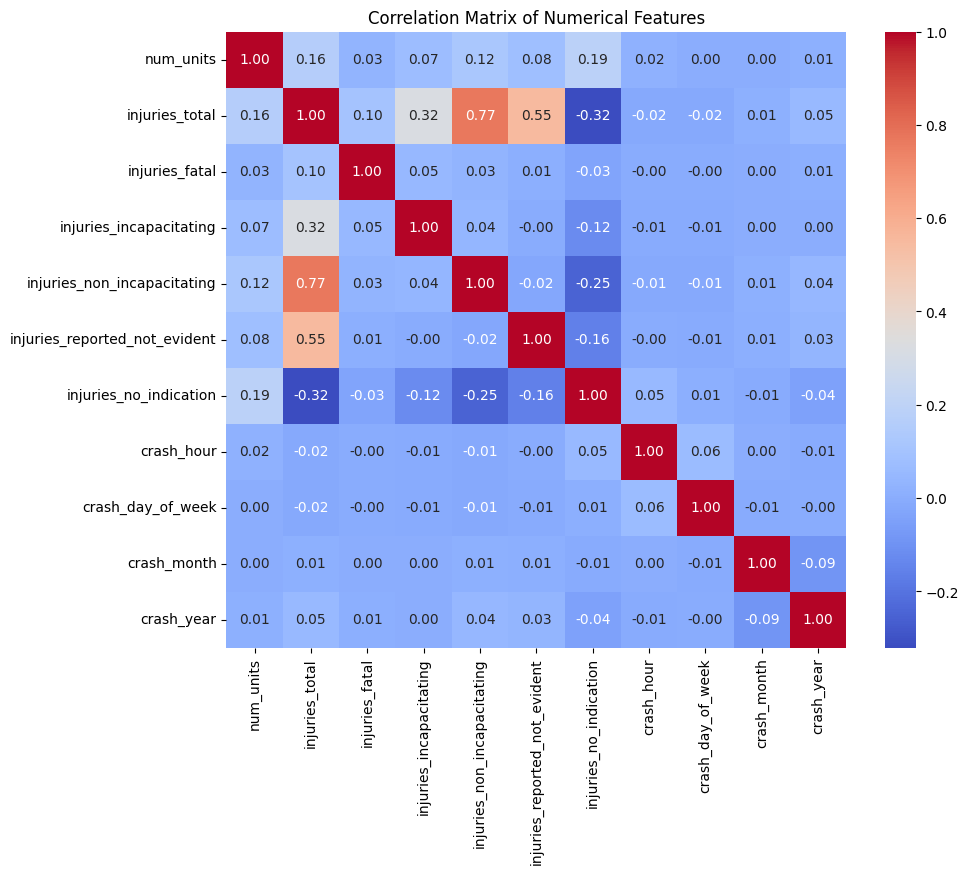

In [9]:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
plt.close()

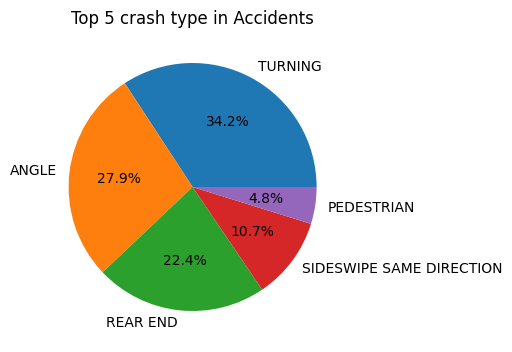

In [10]:
plt.figure(figsize=(4, 6))
df['first_crash_type'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 crash type in Accidents')
plt.ylabel("")
plt.show()
plt.close()

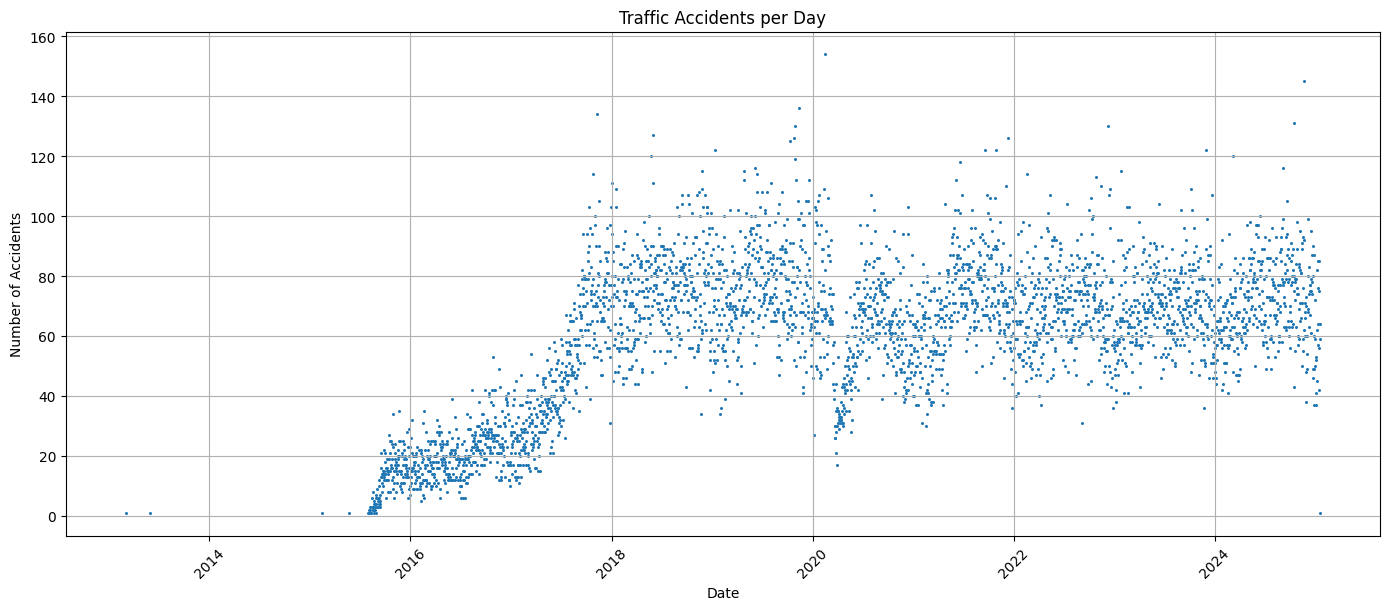

In [11]:
df['accident_time'] = pd.to_datetime(df['crash_date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


df['accident_date'] = df['accident_time'].dt.date


accidents_per_day = df.groupby('accident_date').size()

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(accidents_per_day.index, accidents_per_day.values, marker='o', linestyle='-', s=1.4)
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Traffic Accidents per Day')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Number of Crashes')

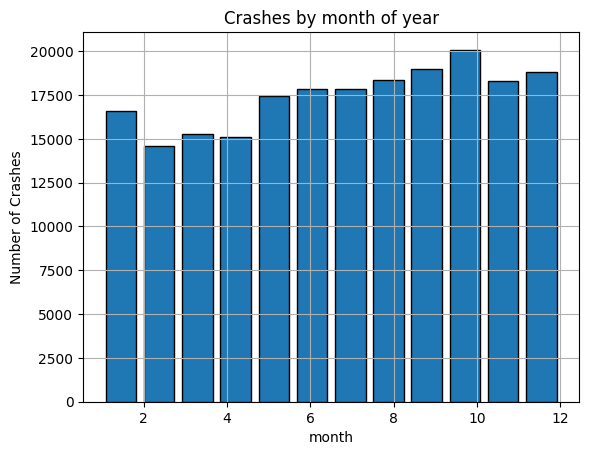

In [12]:
df['crash_month'].hist(bins=12,rwidth=0.8, edgecolor='black')
plt.title("Crashes by month of year")
plt.xlabel("month")
plt.ylabel("Number of Crashes")

Text(0, 0.5, 'Number of Crashes')

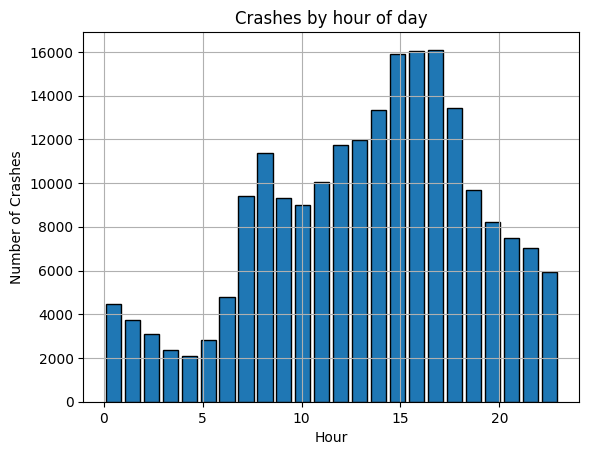

In [13]:
df['crash_hour'].hist(bins=24,rwidth=0.8, edgecolor='black')
plt.title("Crashes by hour of day")
plt.xlabel("Hour")
plt.ylabel("Number of Crashes")

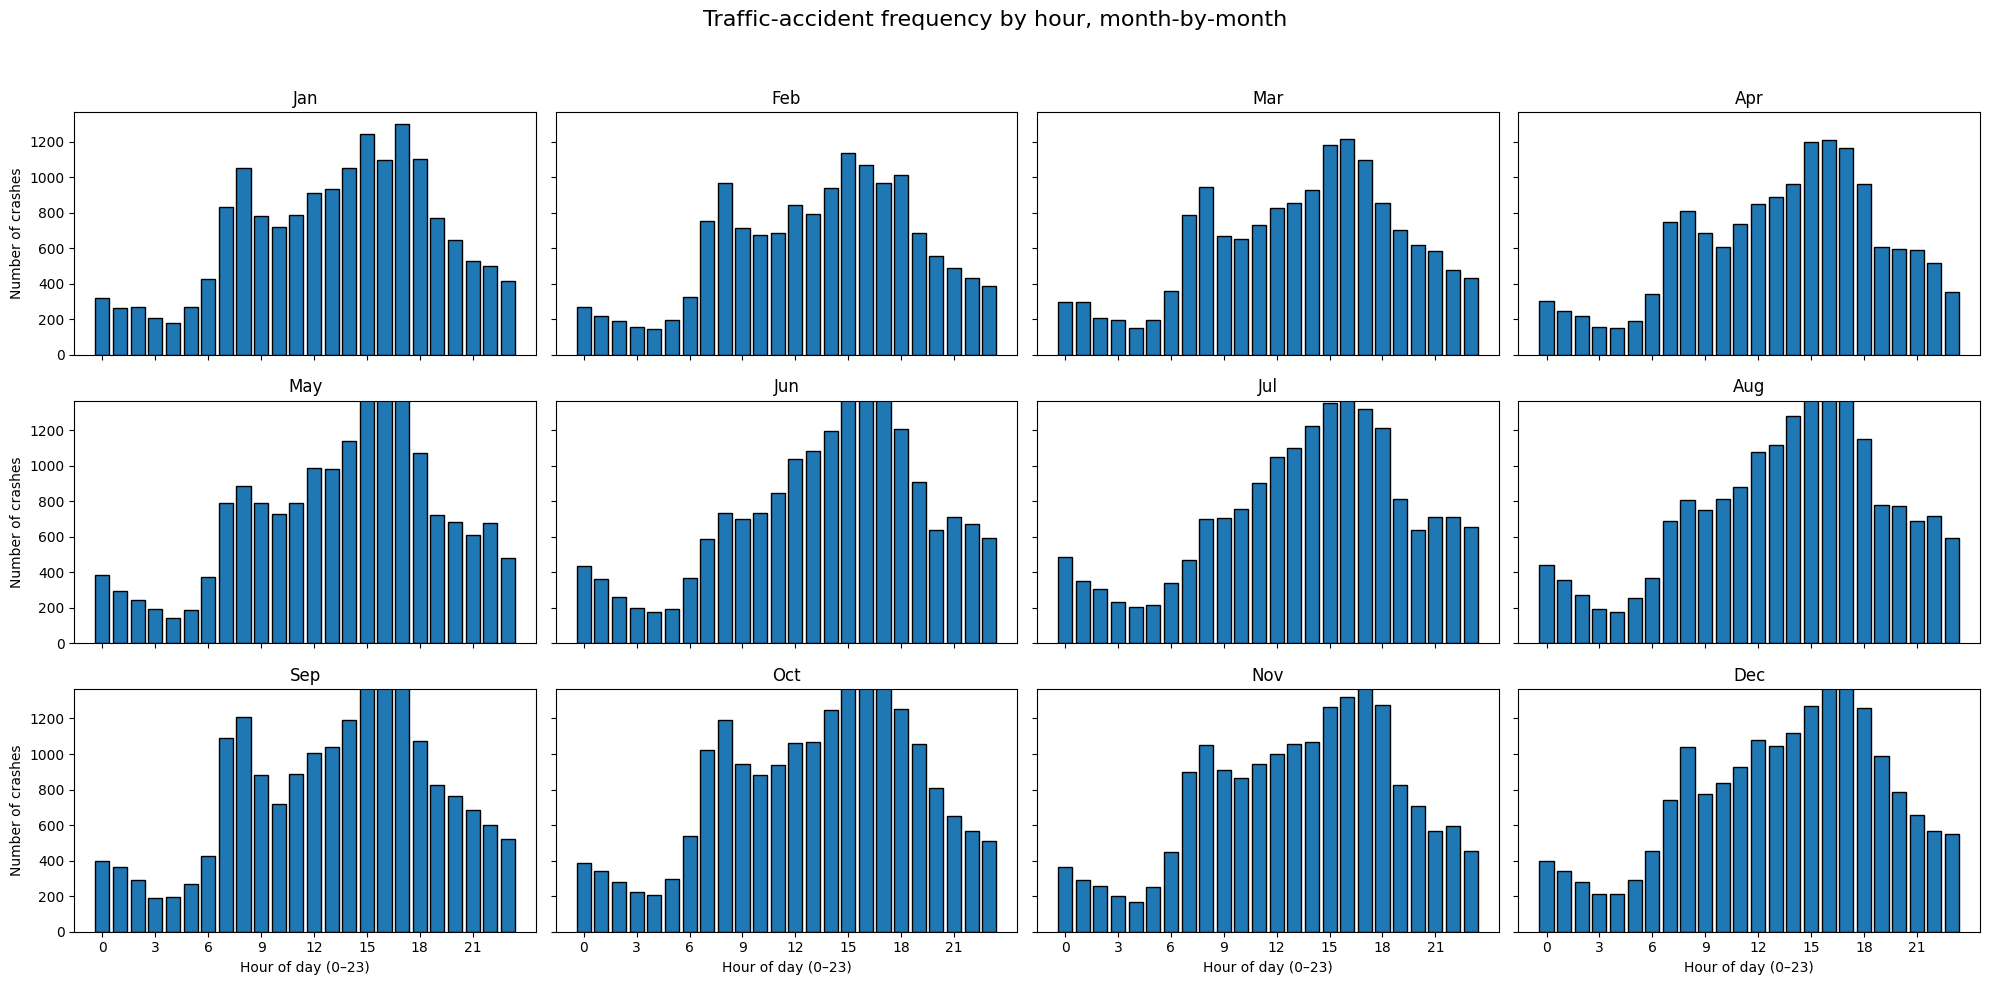

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle('Traffic‑accident frequency by hour, month‑by‑month', fontsize=16)

 
for month, ax in zip(range(1, 13), axes.flatten()):
    hourly_counts = (
        df.loc[df['crash_month'] == month, 'crash_hour']      # pick that month
          .value_counts()                                     # count per hour
          .reindex(range(24), fill_value=0)                   # ensure 0–23 exist
          .sort_index()
    )
    
    ax.bar(hourly_counts.index,
           hourly_counts.values,
           width=0.8, edgecolor='black')
    
    ax.set_title(calendar.month_abbr[month])
    ax.set_xticks(range(0, 24, 3))          # ticks every 3 h to reduce clutter
    ax.set_ylim(bottom=0)                   # start y‑axis at zero

for ax in axes[-1]:                  # bottom row: add x‑label only once
    ax.set_xlabel('Hour of day (0–23)')
for ax in axes[:, 0]:                # first column: add y‑label only once
    ax.set_ylabel('Number of crashes')

fig.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the big title
plt.show()


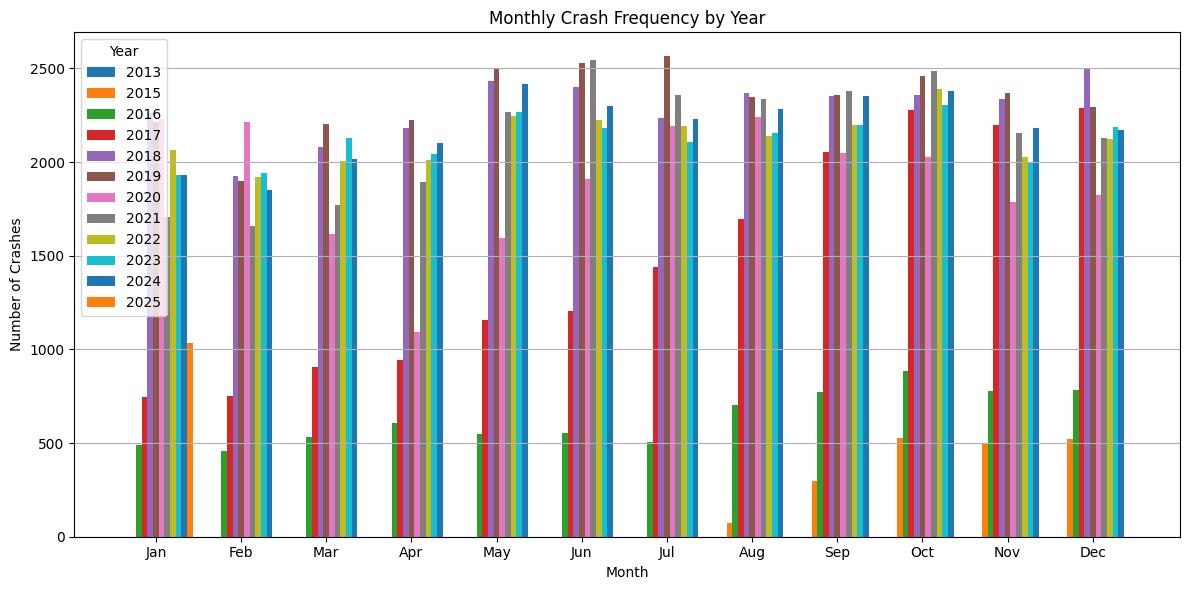

In [15]:
monthly_counts = df.groupby(['crash_year', 'crash_month']).size().unstack(level=0).fillna(0)


months = np.arange(1, 13)
bar_width = 0.8 / len(monthly_counts.columns)  # split width among years
plt.figure(figsize=(12, 6))


for i, year in enumerate(monthly_counts.columns):
    plt.bar(months + i * bar_width, monthly_counts[year], 
            width=bar_width, label=str(year), align='edge')


plt.title("Monthly Crash Frequency by Year")
plt.xlabel("Month")
plt.ylabel("Number of Crashes")
plt.xticks(months + bar_width * (len(monthly_counts.columns) - 1) / 2,  # center the ticks
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

C:\Users\sagar\AppData\Local\Temp\ipykernel_4000\3666065859.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', 12)  # You can try 'nipy_spectral', 'Set3', 'hsv', etc.


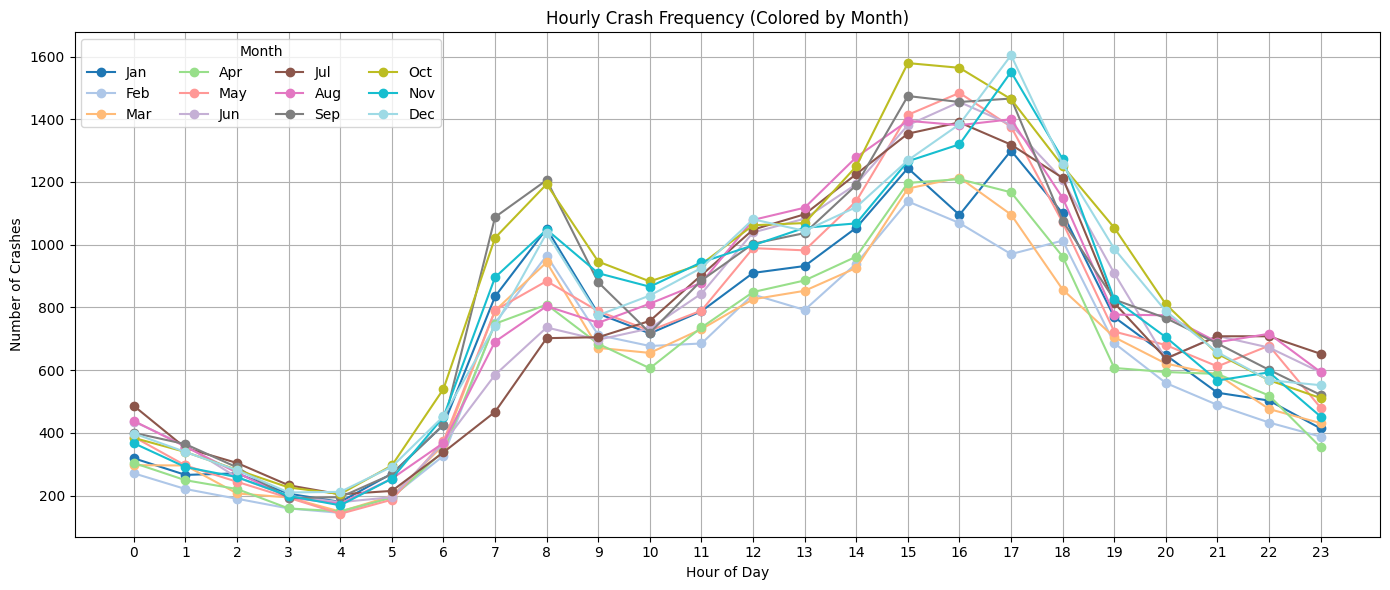

In [16]:
hourly_by_month = (
    df.groupby(['crash_hour', 'crash_month'])
      .size()
      .unstack(fill_value=0)
      .reindex(index=range(24), columns=range(1, 13))
)


cmap = cm.get_cmap('tab20', 12)  # You can try 'nipy_spectral', 'Set3', 'hsv', etc.


plt.figure(figsize=(14, 6))
for i, month in enumerate(hourly_by_month.columns):
    plt.plot(hourly_by_month.index, hourly_by_month[month],
             label=calendar.month_abbr[month],
             color=cmap(i),
             marker='o')

plt.title('Hourly Crash Frequency (Colored by Month)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.legend(title='Month', ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()

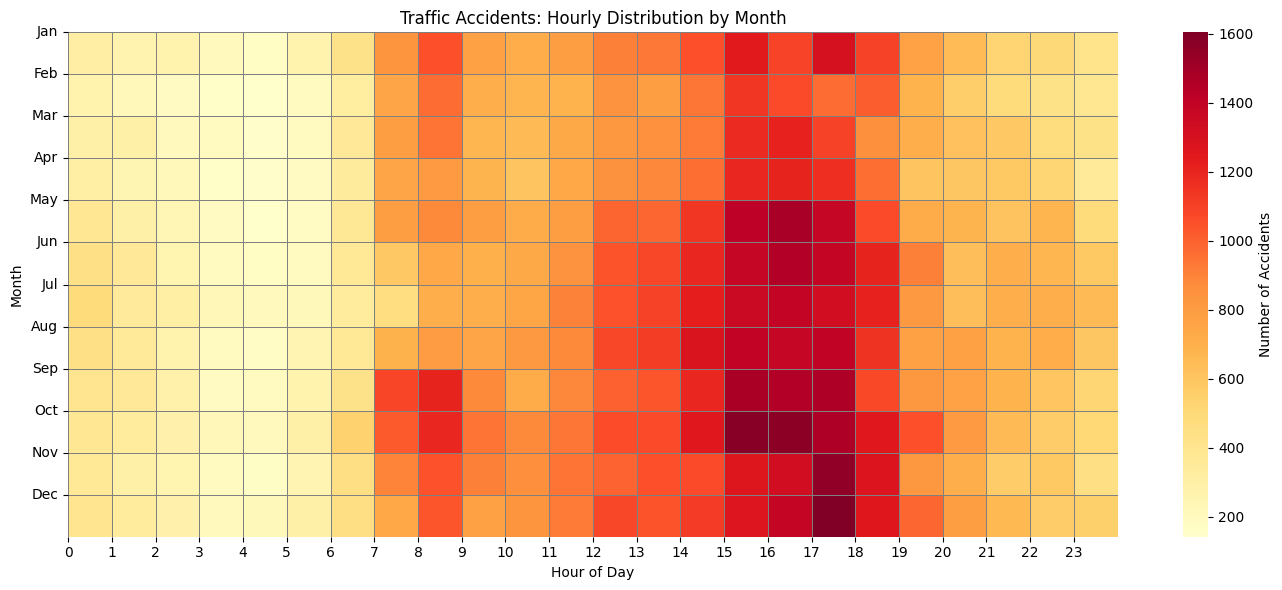

In [17]:
heatmap_data = (
    df.groupby(['crash_month', 'crash_hour'])
      .size()
      .unstack(fill_value=0)
      .reindex(index=range(1, 13), columns=range(24))  # Month as rows, hour as cols
)


plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Number of Accidents'})

# Set axis labels and ticks
plt.title('Traffic Accidents: Hourly Distribution by Month')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.tight_layout()
plt.show()

In [18]:
 df['first_crash_type'].value_counts()

first_crash_type
TURNING                         64150
ANGLE                           52243
REAR END                        42007
SIDESWIPE SAME DIRECTION        20114
PEDESTRIAN                       8995
PEDALCYCLIST                     5335
PARKED MOTOR VEHICLE             4892
FIXED OBJECT                     4742
SIDESWIPE OPPOSITE DIRECTION     1839
HEAD ON                          1790
REAR TO FRONT                    1157
REAR TO SIDE                      773
OTHER OBJECT                      759
OTHER NONCOLLISION                249
OVERTURNED                         96
ANIMAL                             77
REAR TO REAR                       49
TRAIN                               8
Name: count, dtype: int64

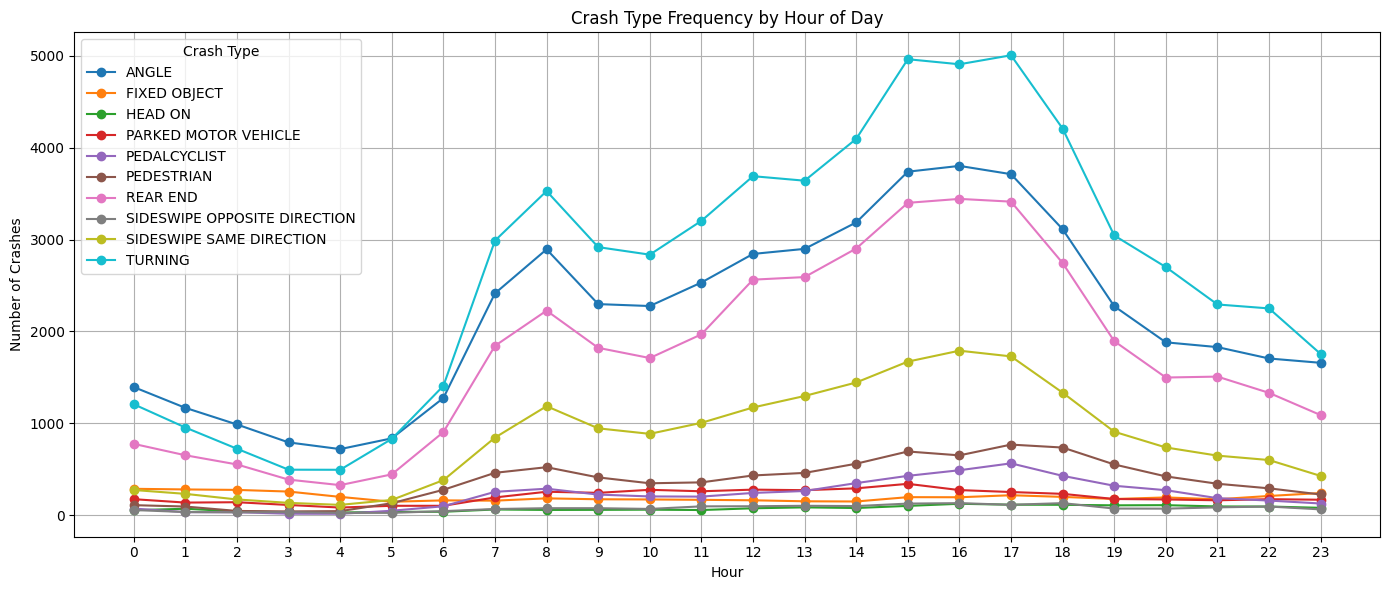

In [19]:
top10 = df['first_crash_type'].value_counts().head(10).index


filtered = df[df['first_crash_type'].isin(top10)]

# Group by hour and crash type
hourly_counts = (
    filtered.groupby(['crash_hour', 'first_crash_type'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=range(24))  # make sure all 0–23 are shown
)


plt.figure(figsize=(14, 6))
for crash_type in hourly_counts.columns:
    plt.plot(hourly_counts.index, hourly_counts[crash_type], marker='o', label=crash_type)

plt.title('Crash Type Frequency by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24))
plt.legend(title='Crash Type')
plt.grid(True)
plt.tight_layout()
plt.show()

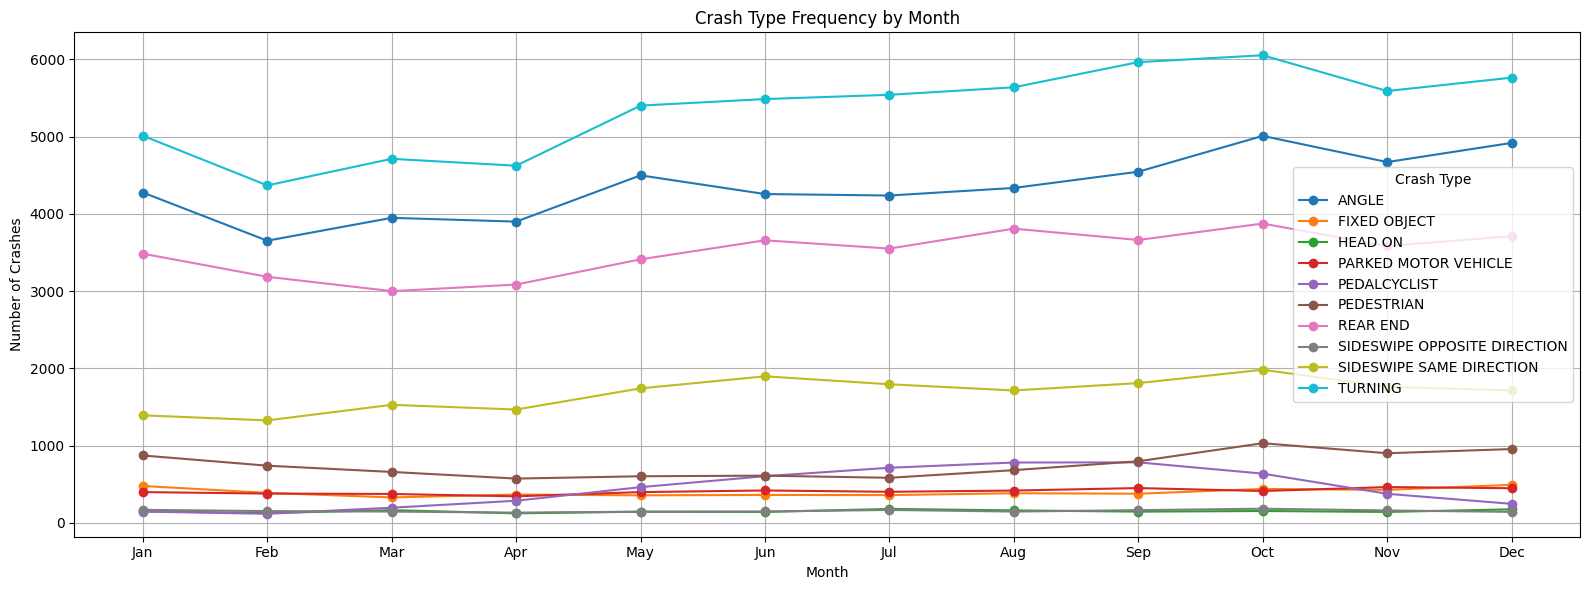

In [20]:
monthly_counts = (
    filtered.groupby(['crash_month', 'first_crash_type'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=range(1, 13))
)

plt.figure(figsize=(16, 6))
for crash_type in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[crash_type], marker='o', label=crash_type)

plt.title('Crash Type Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Crash Type')
plt.grid(True)
plt.tight_layout()
plt.show()

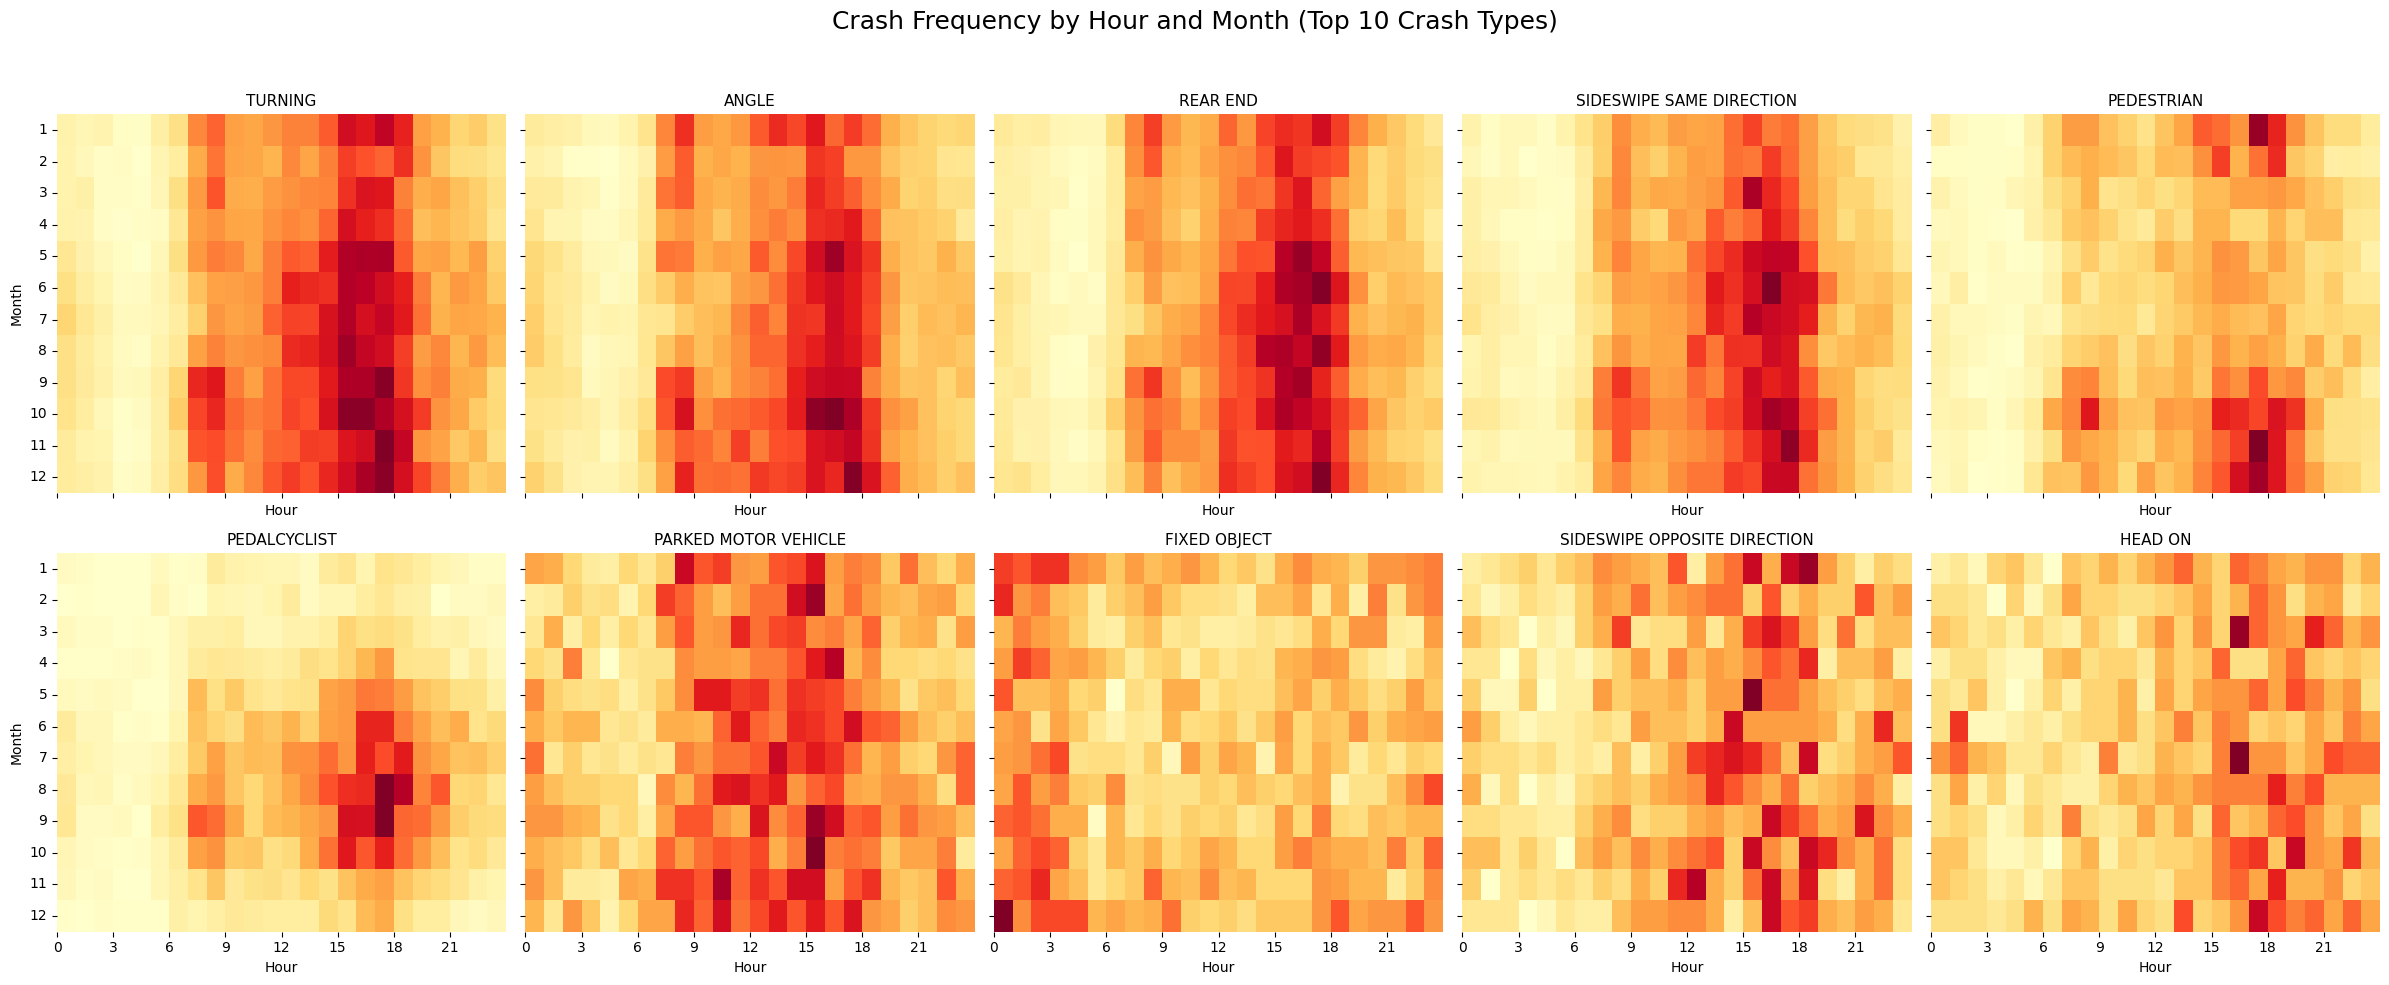

In [21]:

top10 = df['first_crash_type'].value_counts().head(10).index
filtered = df[df['first_crash_type'].isin(top10)]


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 10), sharex=True, sharey=True)
fig.suptitle("Crash Frequency by Hour and Month (Top 10 Crash Types)", fontsize=18)
axes = axes.flatten()


for i, crash_type in enumerate(top10):
    data = (
        filtered[filtered['first_crash_type'] == crash_type]
        .groupby(['crash_month', 'crash_hour'])
        .size()
        .unstack(fill_value=0)
        .reindex(index=range(1, 13), columns=range(24))
    )
    
    sns.heatmap(data, ax=axes[i], cmap='YlOrRd', cbar=False)
    axes[i].set_title(crash_type, fontsize=11)
    
    
    axes[i].set_xlabel("Hour")
    axes[i].set_xticks(range(0, 24, 3))
    axes[i].set_xticklabels(range(0, 24, 3))
    
   
    if i % 5 == 0:
        axes[i].set_ylabel("Month")
        axes[i].set_yticks(range(1, 13))
        axes[i].set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                                 'Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
    else:
        axes[i].set_ylabel("")


for j in range(len(top10), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()